<div style="font-size: 14;color:red;font-size:25PX;font-family: arial;" align ="rigth" dir="rtl">
<b>
بعد از آماده سازی داده ها این مرحله اجرا می شود
</b>
</div>

<div style="font-size: 14;color:red;font-size:25PX;font-family: arial;" align ="rigth" dir="rtl">
<b>
1- فراخوان توابع و کتابخانه های مورد نیاز
</b>
</div>

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.gridspec import GridSpec
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
from scipy.stats import gaussian_kde
#working_dir = os.getcwd()
working_dir ='..'  # Use on Jupyter Notebook

<div style="font-size: 14;color:red;font-size:25PX;font-family: arial;" align ="rigth" dir="rtl">
<b>
2- ساخت دیتافریم خالی از روی داده های کوره
</b>
</div>

In [3]:
df = pd.read_csv(f"{working_dir}/data/eaf_data.csv")
df.set_index(keys='Heat', inplace=True ,drop=True)
root_df = pd.DataFrame(data=df['tar (EAF)'])
print(f'EAF Dataset Rows: {root_df.shape}')
print(root_df.head())
del df

EAF Dataset Rows: (3317, 1)
           tar (EAF)
Heat                
4024675.0   14020915
4024676.0   14020915
4024677.0   14020915
4024678.0   14020915
4024681.0   14020915


<div style="font-size: 14;color:red;font-size:25PX;font-family: arial;" align ="rigth" dir="rtl">
<b>
3- تجمیع تمام دیتاهای متریال ورودی به کوره 
</b>
</div>

In [13]:
df = pd.read_csv(f"{working_dir}/data/eaf_data.csv")
df.set_index(keys='Heat', inplace=True ,drop=True)
root_df = df.drop(labels=['tar (EAF)'],axis=1).copy()
print(f'EAF Dataset Rows: {root_df.shape}')
del df
#---------------Add slag data------------
df = pd.read_csv(f"{working_dir}/data/slag_with_labels.csv")
results = pd.merge(left=root_df,right=df,left_index=True,right_on='heat_no',how='left')
results.drop(labels=['heat_no','Slag_labels'] ,axis=1,inplace=True)
results.set_index(keys=root_df.index, inplace=True ,drop=True)
root_df = results.copy()
root_df = root_df.ffill()
print(root_df.info())
print(f'Final Shape of Dataset: {root_df.shape}')
root_df.to_csv(f"{working_dir}/data/eaf_and_slag.csv",index=True)
del df,results,root_df

EAF Dataset Rows: (3317, 18)
<class 'pandas.core.frame.DataFrame'>
Index: 3317 entries, 4024675.0 to 4034594.0
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Duration (EAF)            3317 non-null   float64
 1   Power On (EAF)            3317 non-null   float64
 2   Power Off (EAF)           3317 non-null   float64
 3   Delays (EAF)              3317 non-null   float64
 4   DRI [t] (EAF)             3317 non-null   float64
 5   Ele [MW] (EAF)            3317 non-null   float64
 6   Tapped [t] (EAF)          3317 non-null   float64
 7   Tapped [kWh/t] (EAF)      3317 non-null   float64
 8   O2 [Nm3] (EAF)            3317 non-null   float64
 9   CH4 [Nm3] (EAF)           3317 non-null   float64
 10  C.inj [kg] (EAF)          3317 non-null   float64
 11  Chemical [MWh] (EAF)      3317 non-null   float64
 12  C [kg] (EAF)              3317 non-null   float64
 13  CaO [kg] (EAF)            

(3317, 28)
                 0                     1
0  Power Off (EAF)          Delays (EAF)
1    DRI [t] (EAF)         EAF_DRI (EAF)
2   O2 [Nm3] (EAF)  Chemical [MWh] (EAF)
3        b2 (Slag)             b3 (Slag)
(3317, 2)
(3317,)


/tmp/ipykernel_3113/1298528571.py:33: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.scatterplot(


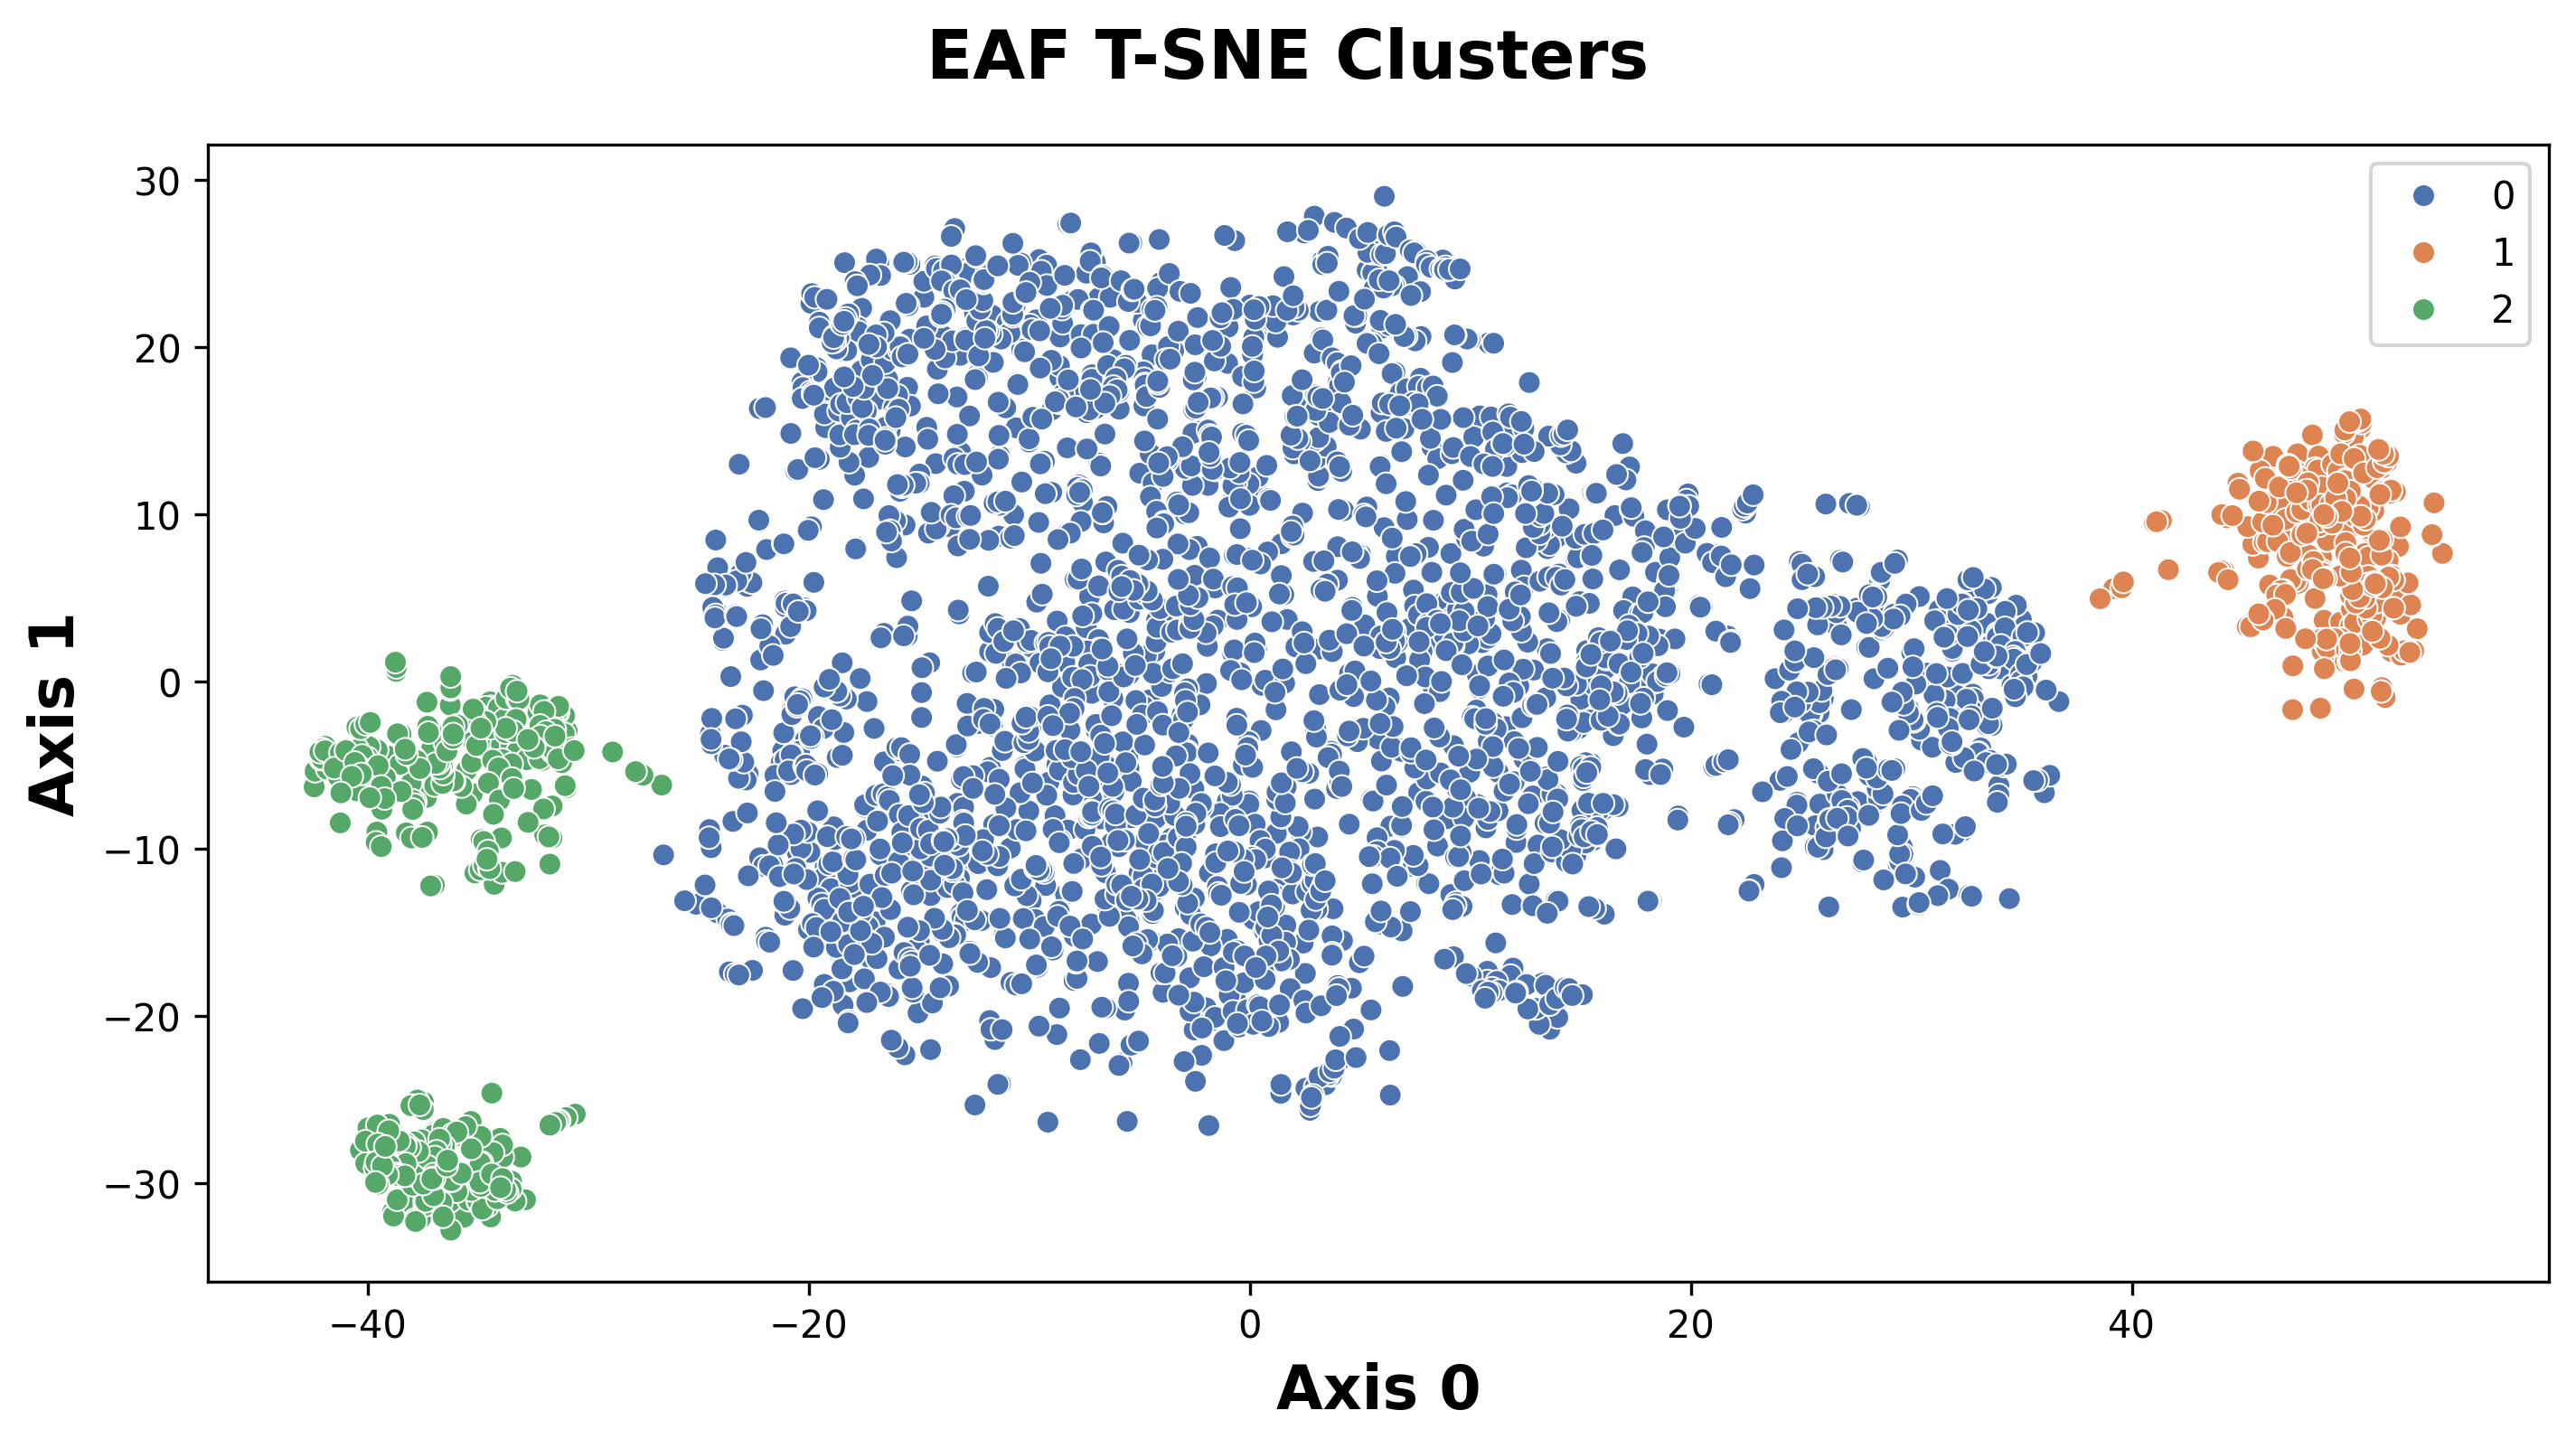

(3317, 24)
Index(['Duration (EAF)', 'Power On (EAF)', 'Power Off (EAF)', 'DRI [t] (EAF)',
       'Ele [MW] (EAF)', 'Tapped [t] (EAF)', 'Tapped [kWh/t] (EAF)',
       'O2 [Nm3] (EAF)', 'CH4 [Nm3] (EAF)', 'C.inj [kg] (EAF)', 'C [kg] (EAF)',
       'CaO [kg] (EAF)', 'MgO [kg] (EAF)', 'Tapping Time [Sec] (EAF)',
       'HDRI(T) (EAF)', 'cao (Slag)', 'feo (Slag)', 'sio2 (Slag)',
       'mgo (Slag)', 'al2o3 (Slag)', 'p2o5 (Slag)', 'mno (Slag)', 'b2 (Slag)'],
      dtype='object')


/tmp/ipykernel_3113/1298528571.py:62: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.kdeplot(
/tmp/ipykernel_3113/1298528571.py:62: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.kdeplot(
/tmp/ipykernel_3113/1298528571.py:62: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.kdeplot(
/tmp/ipykernel_3113/1298528571.py:62: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.kdeplot(
/tmp/ipykernel_3113/1298528571.py:62: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.kdeplot(
/tmp/ipykernel_3113/1298528571.py:62: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.kdeplot(
/tmp/ipykernel_3113/1298528571.py:62: UserWarning: The palette list has more values (10) than needed (3), which 

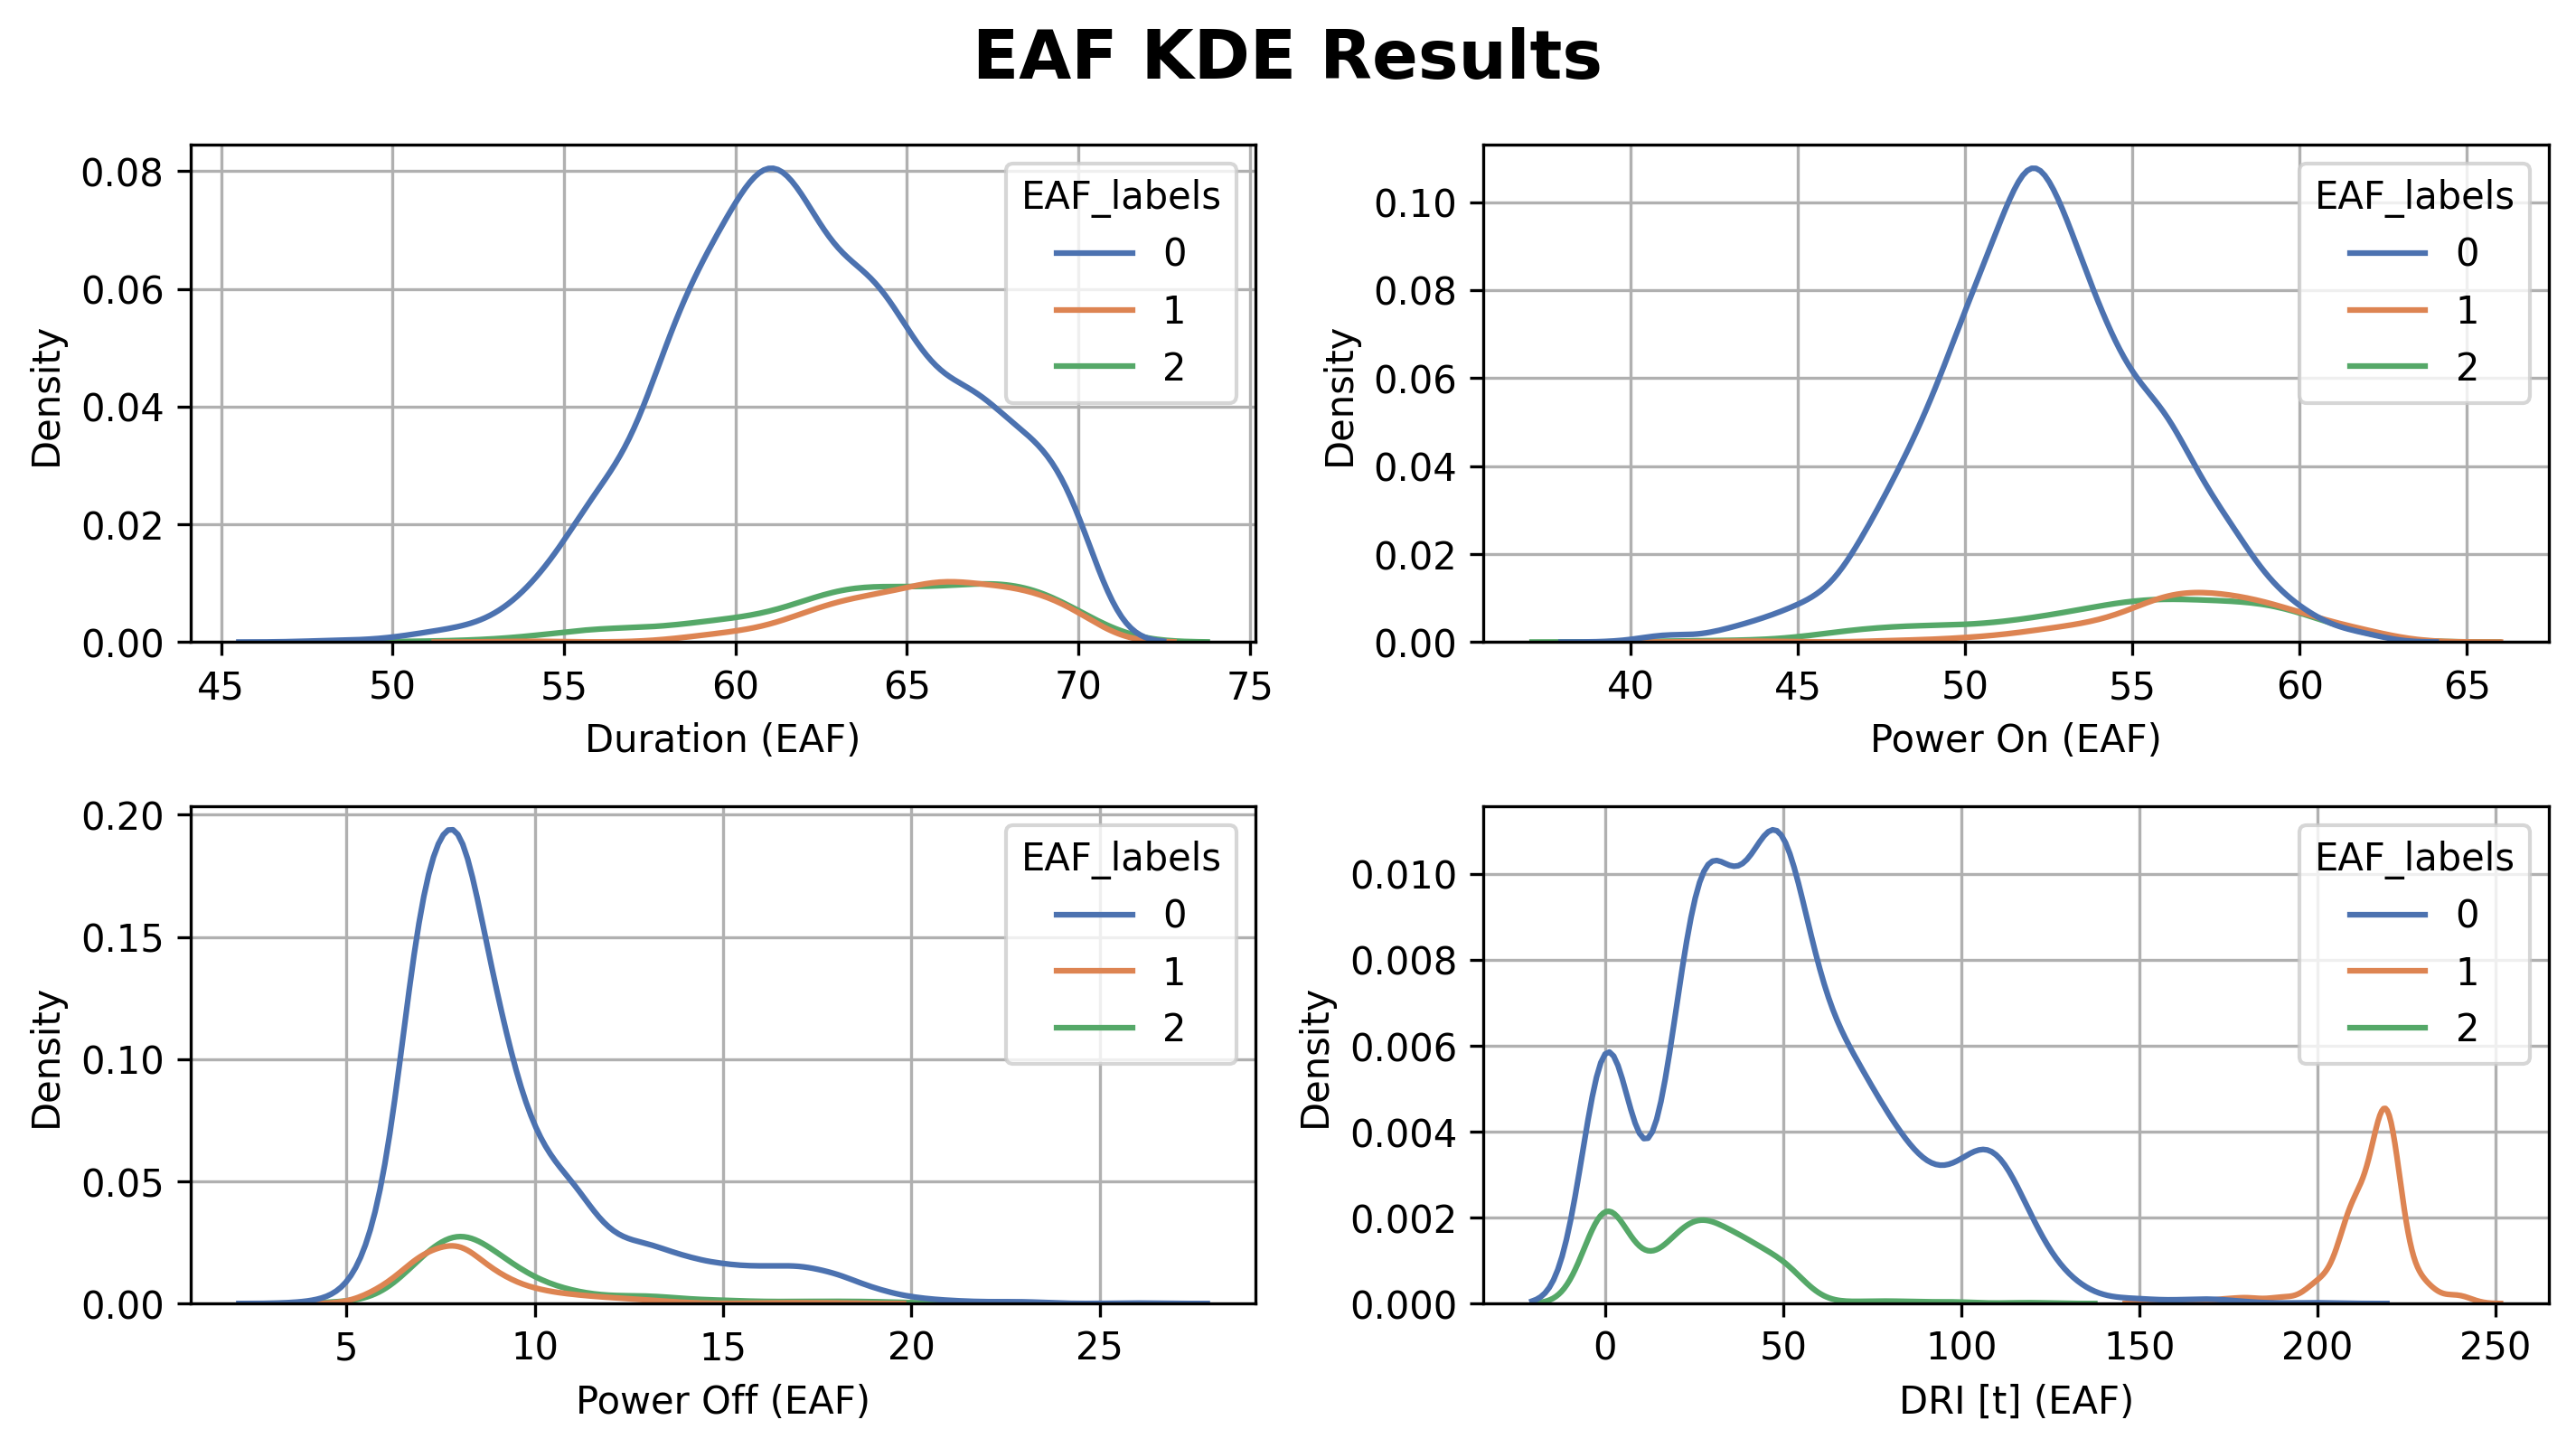

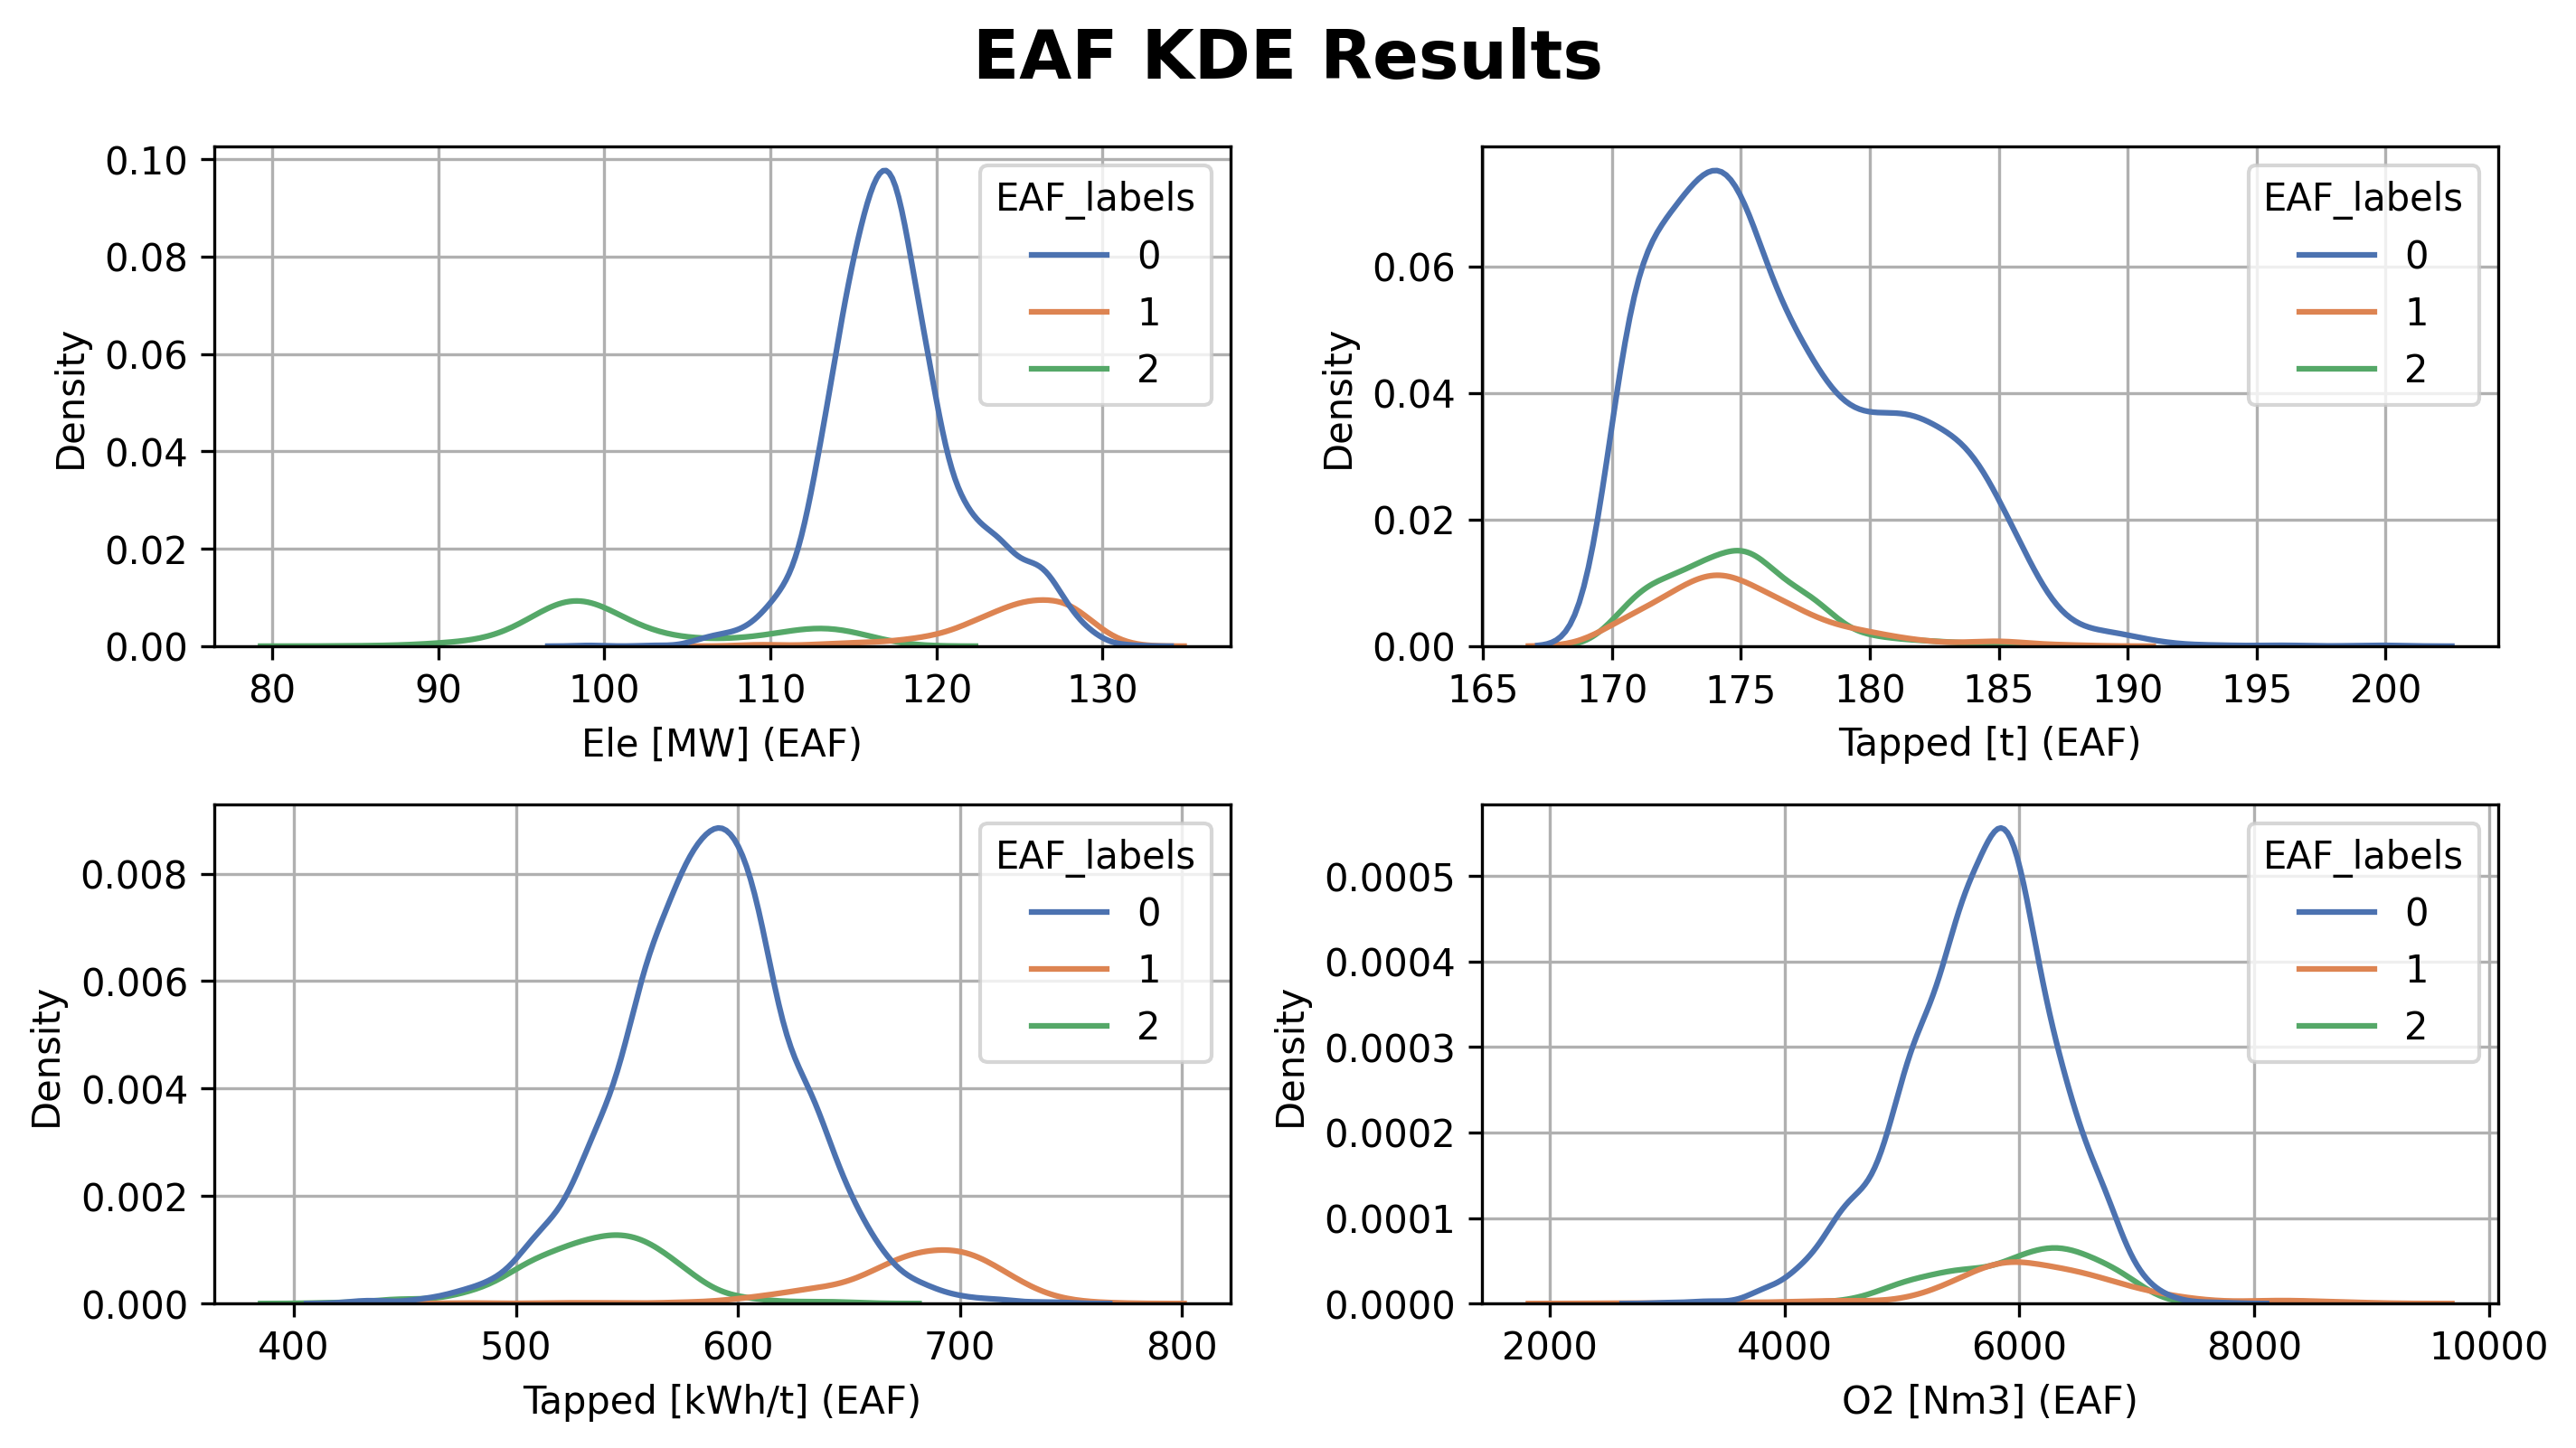

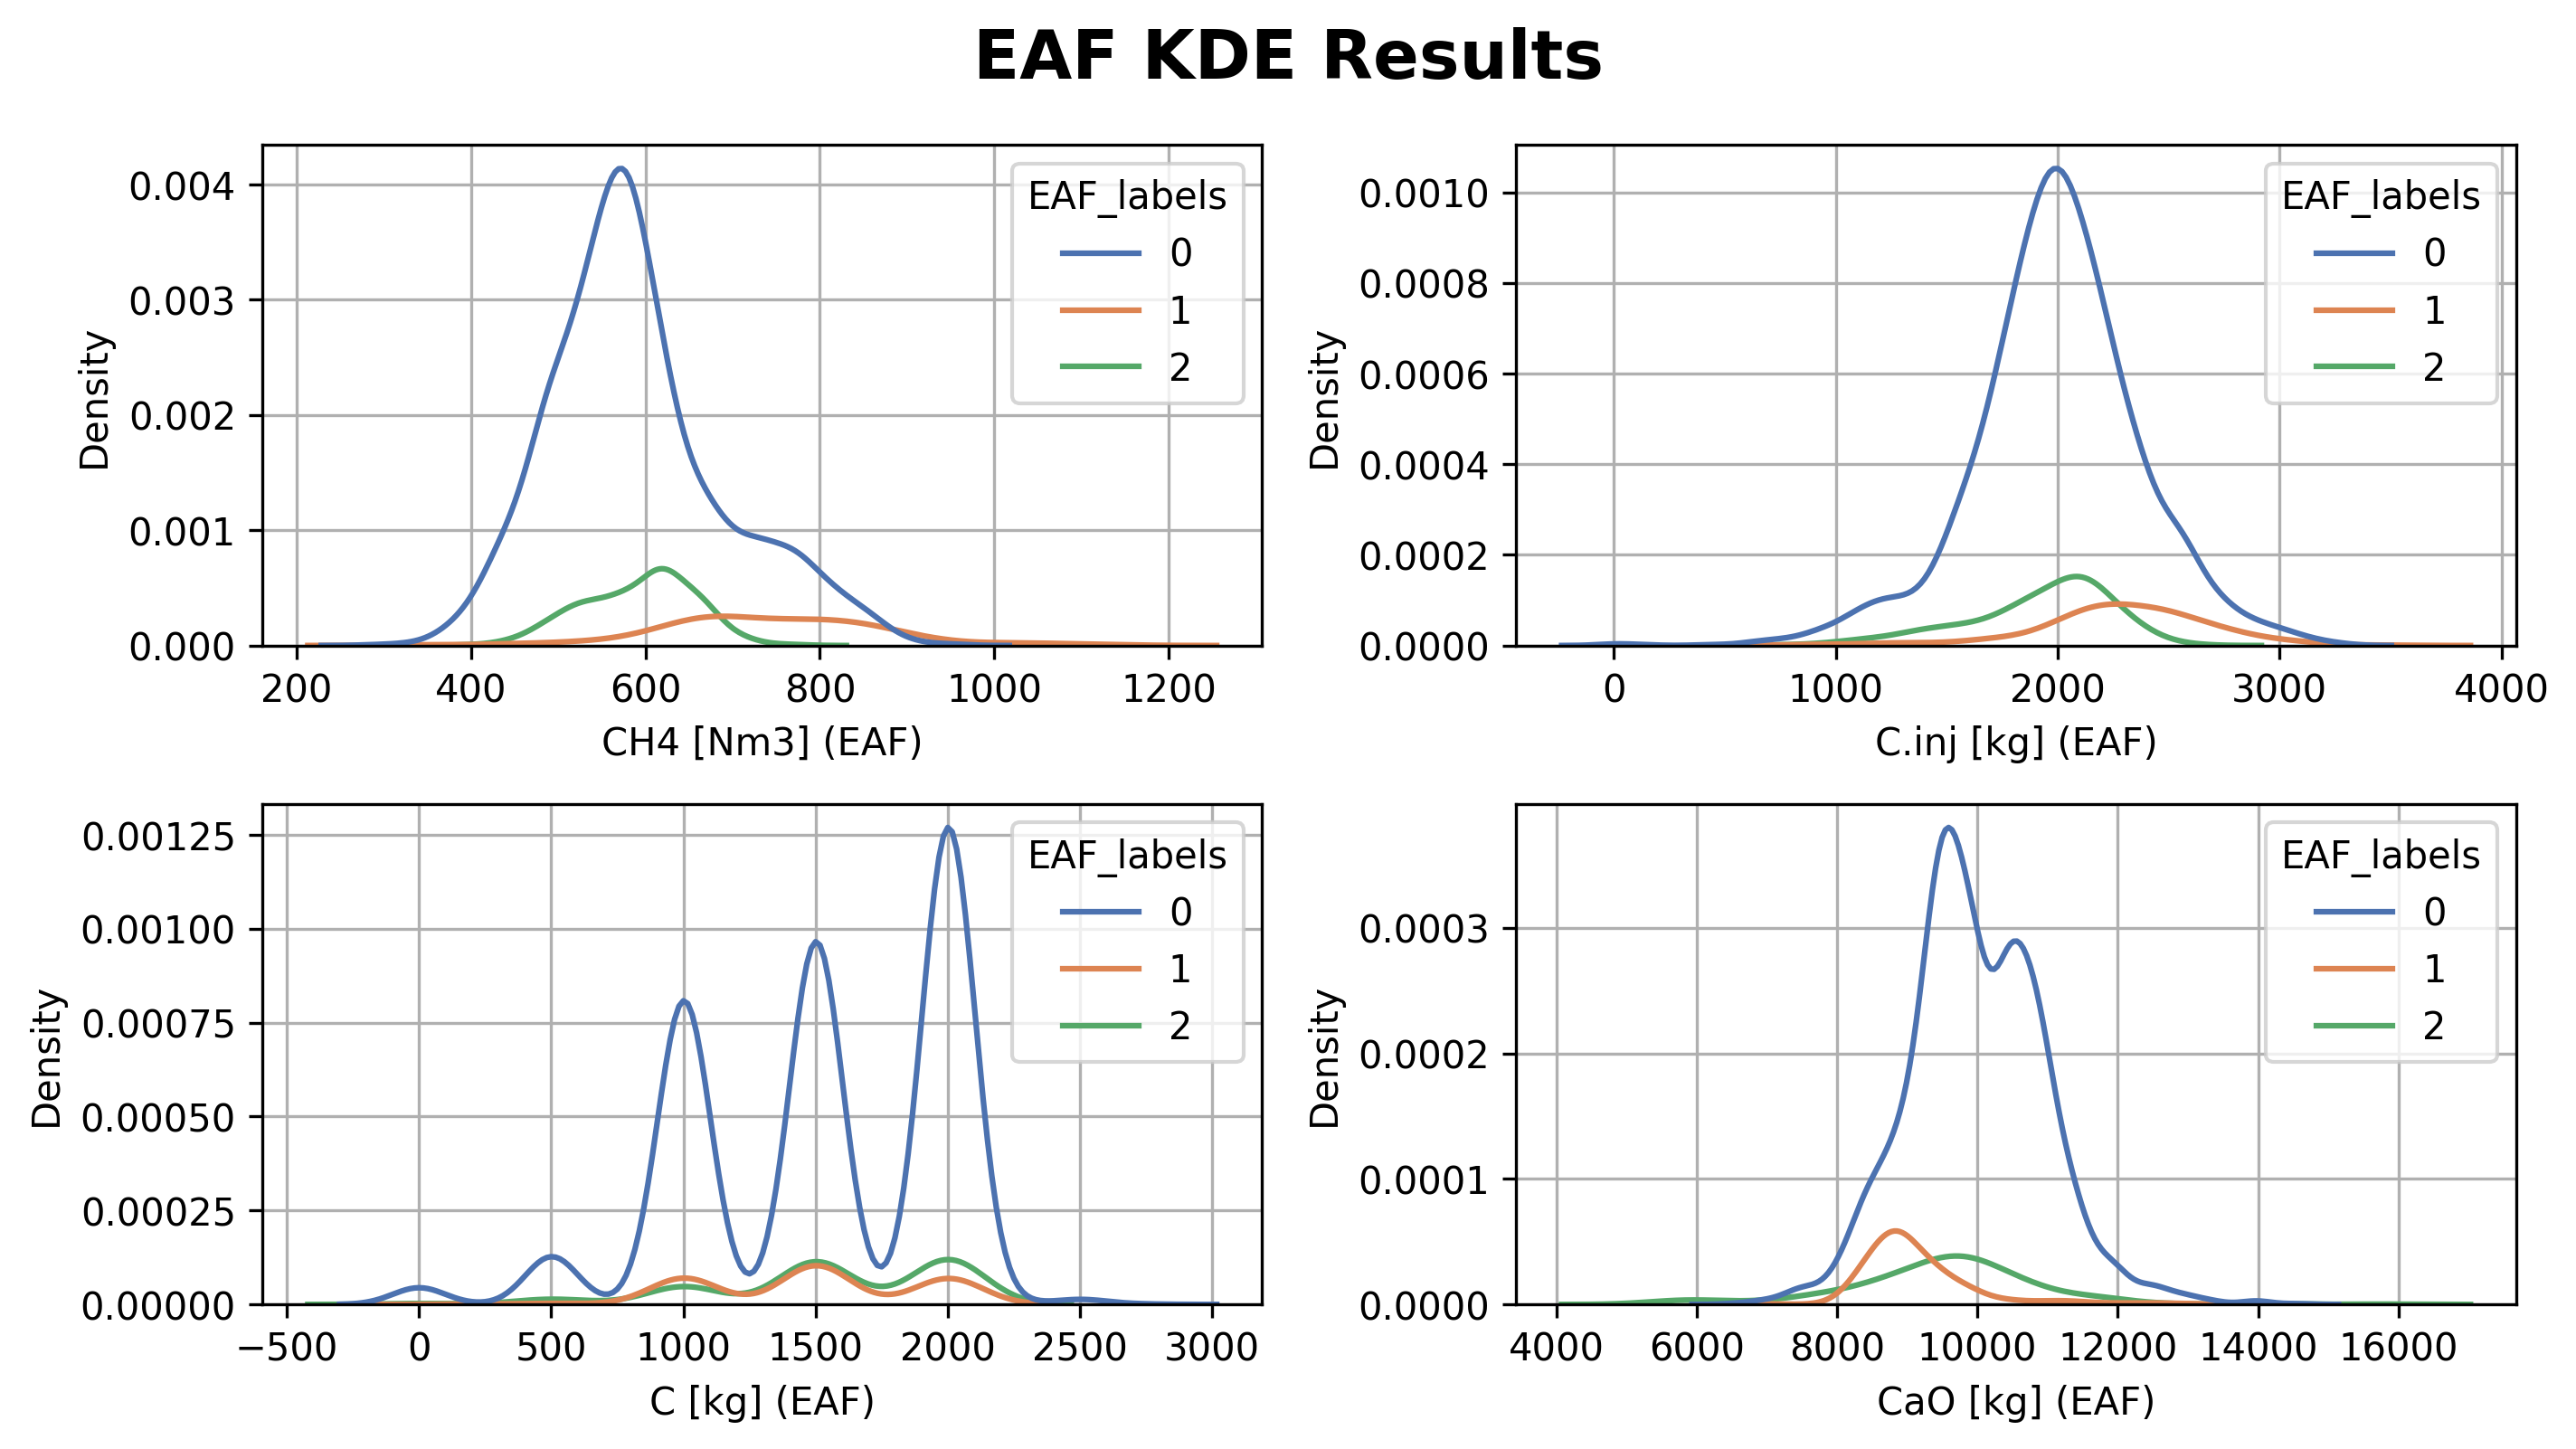

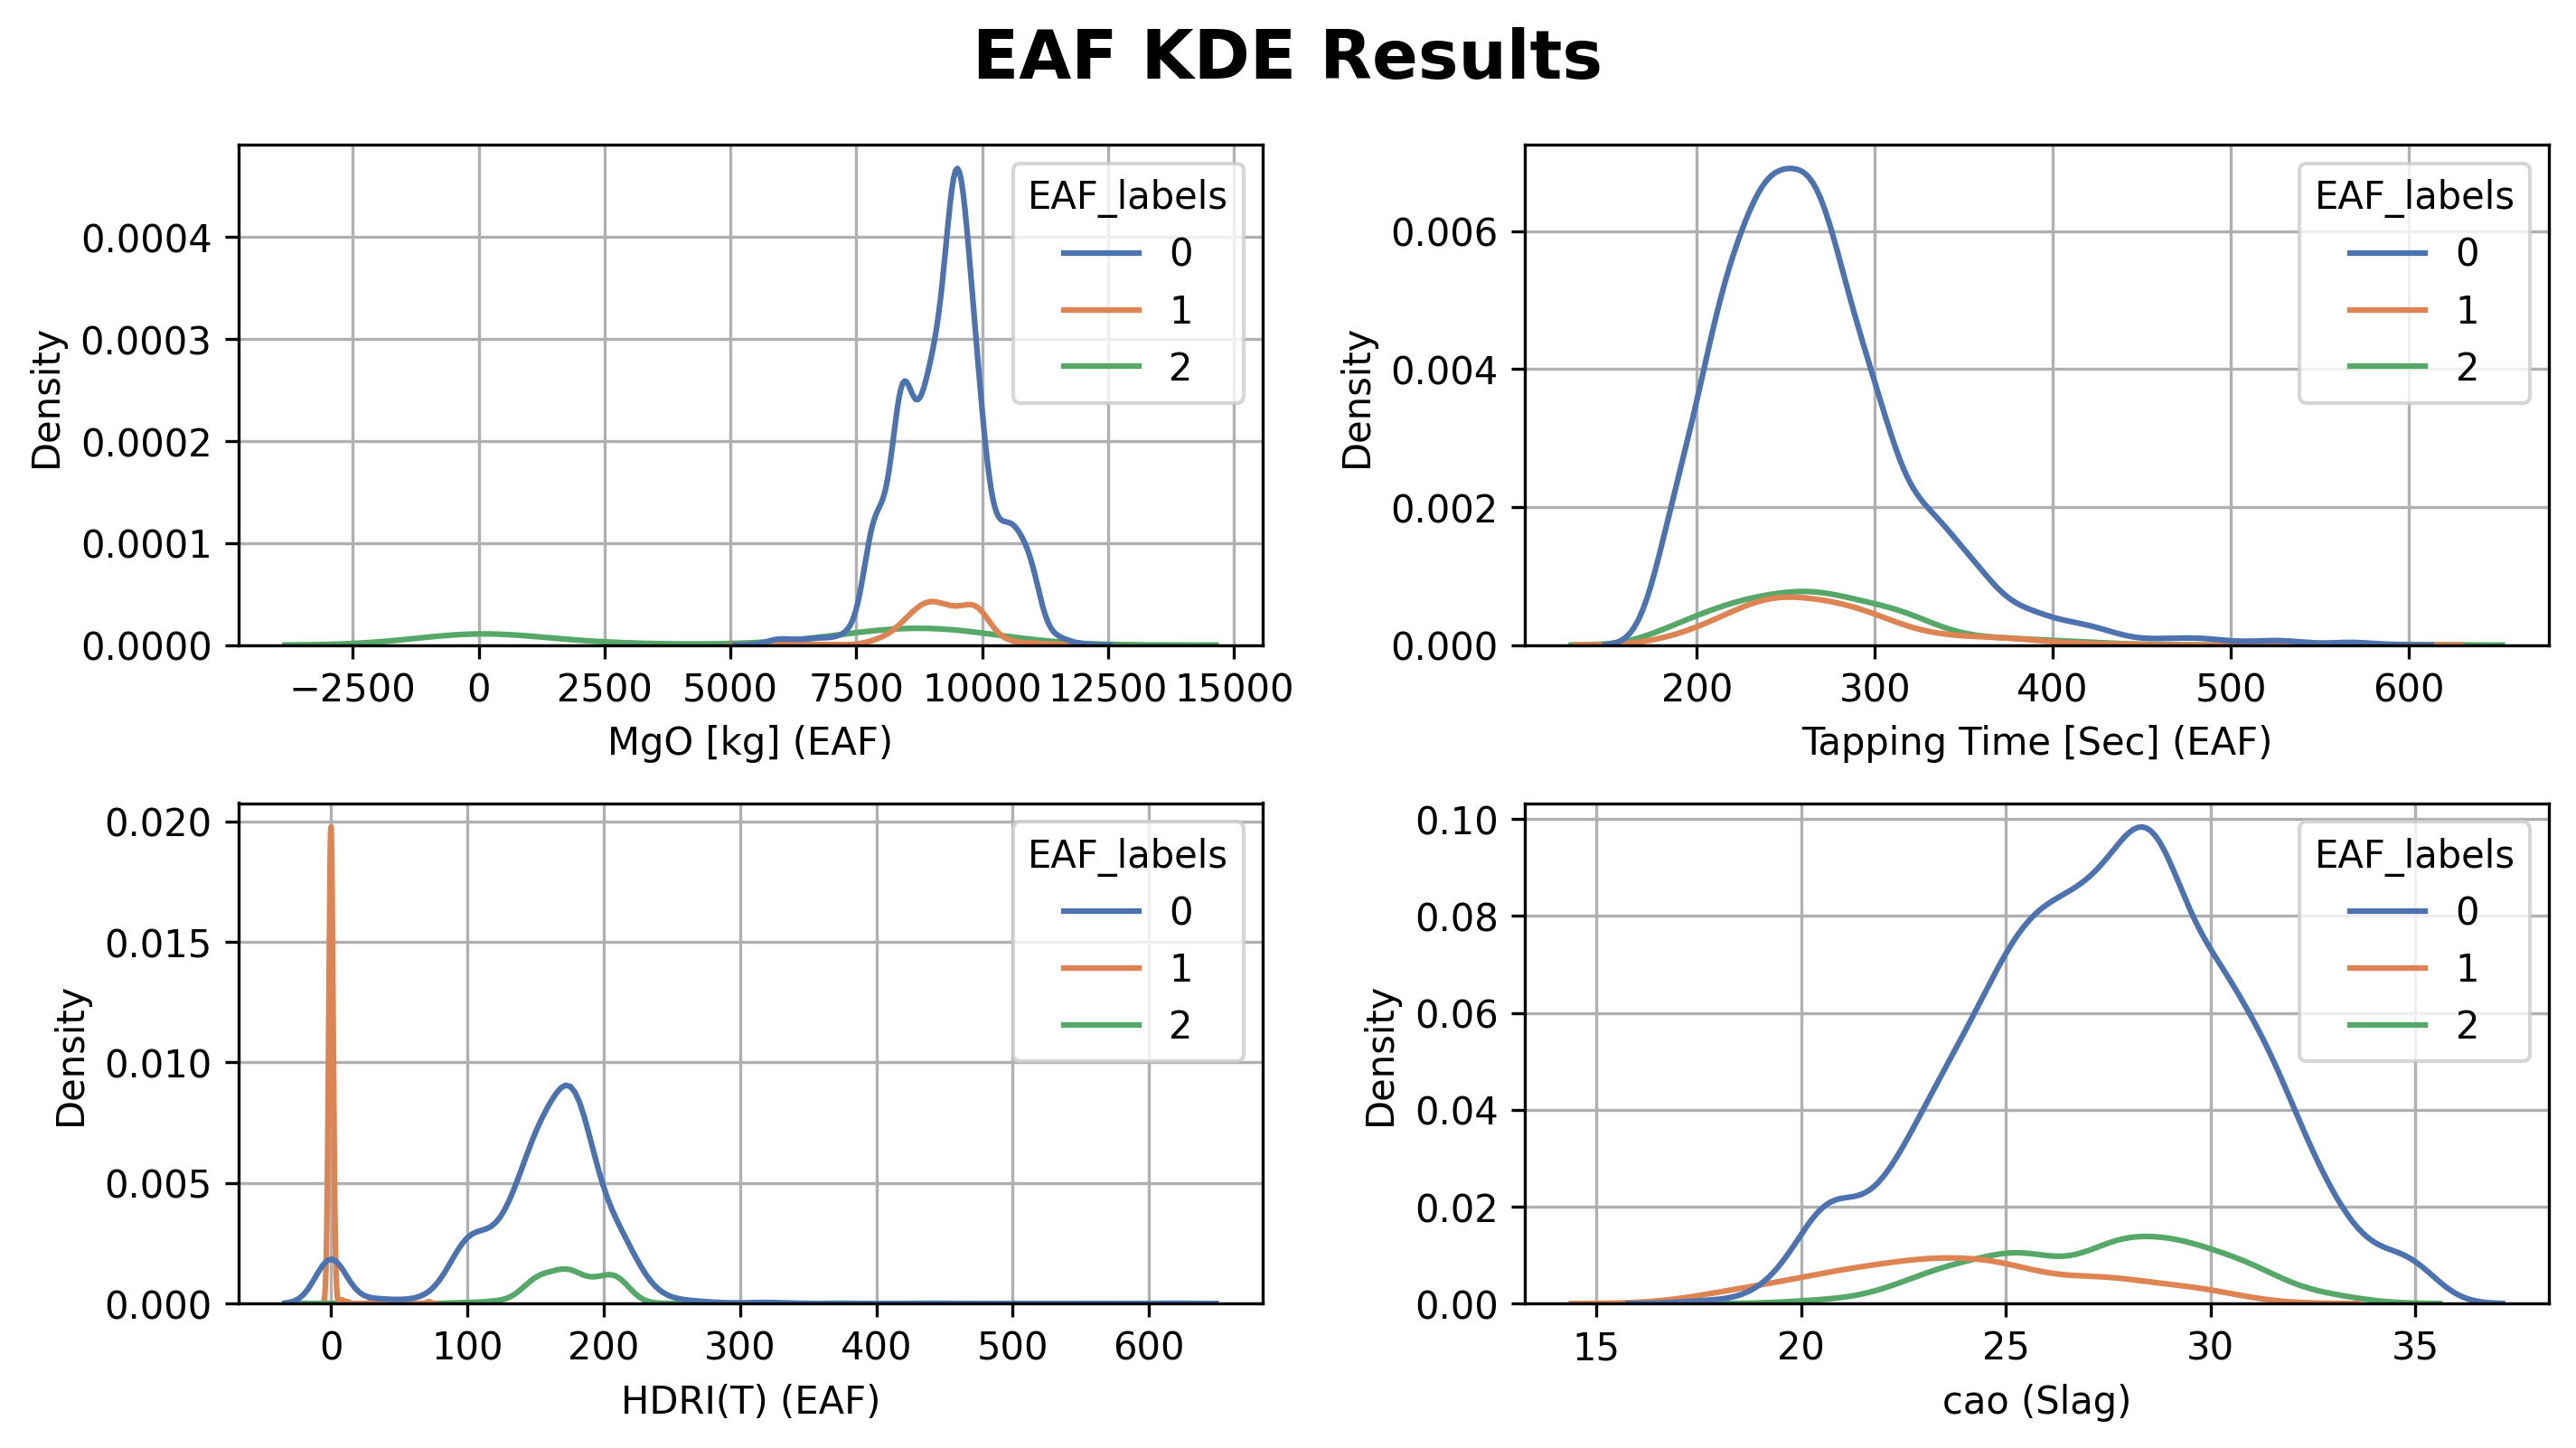

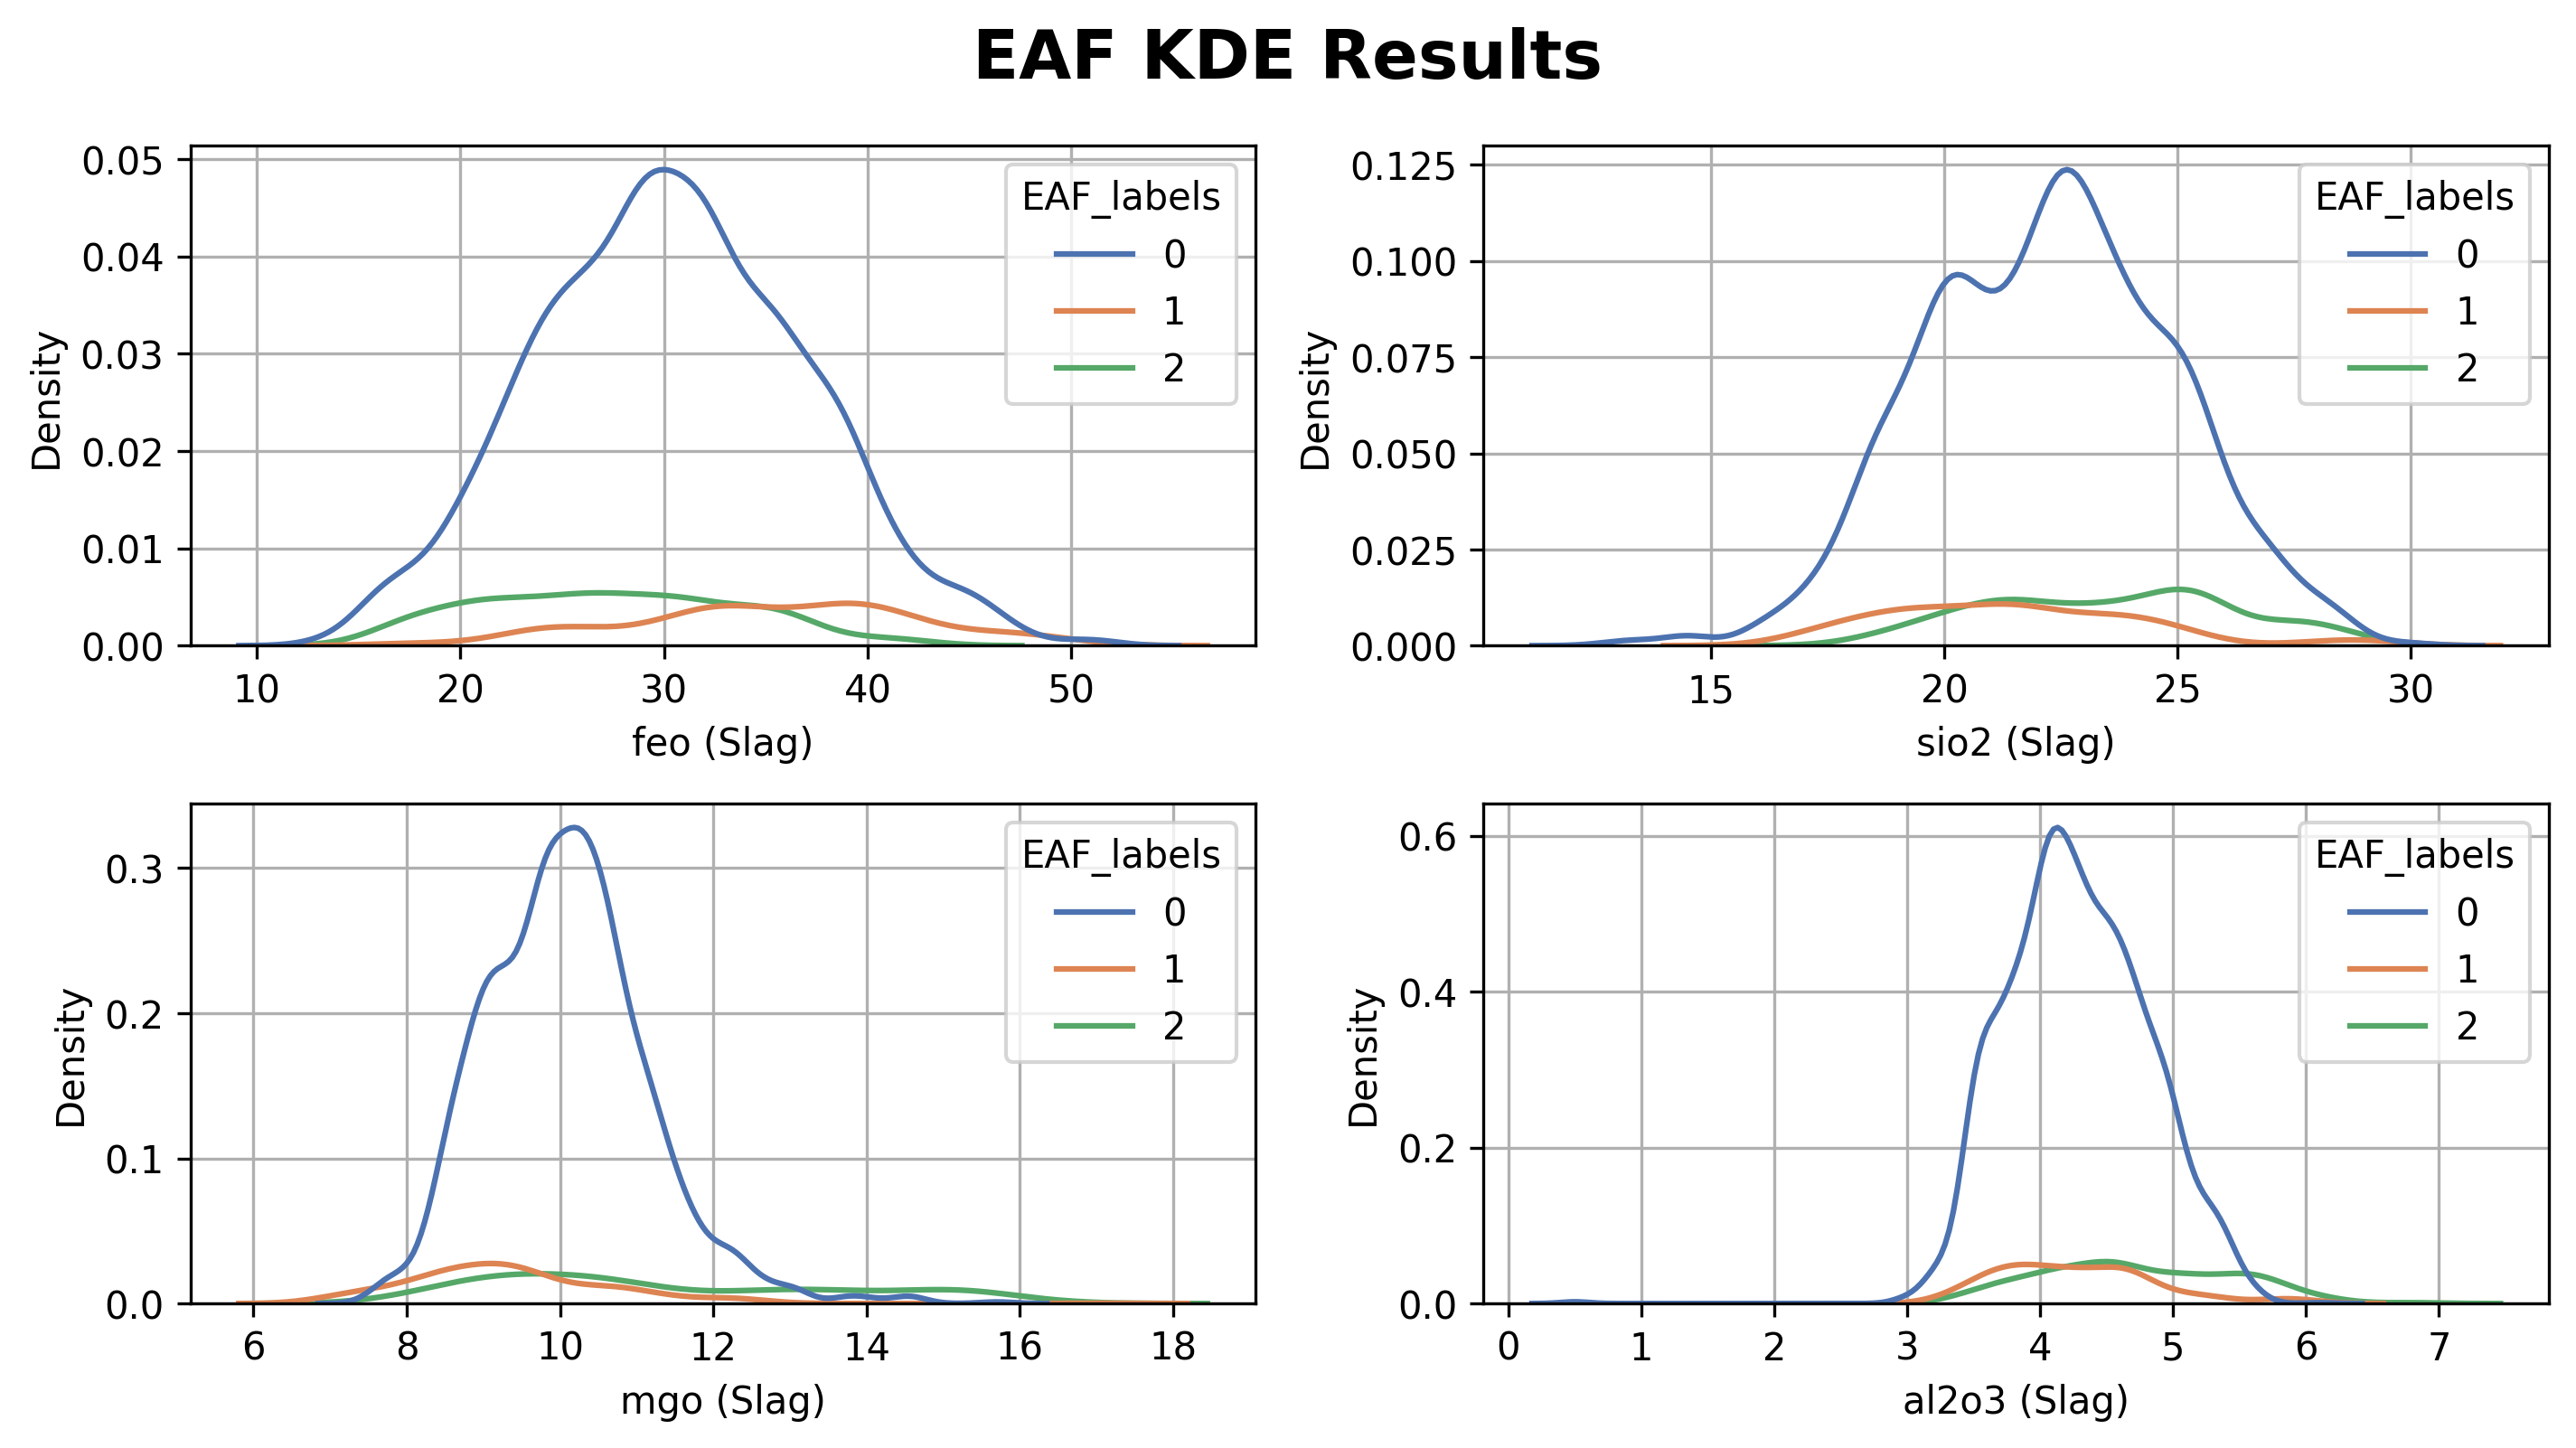

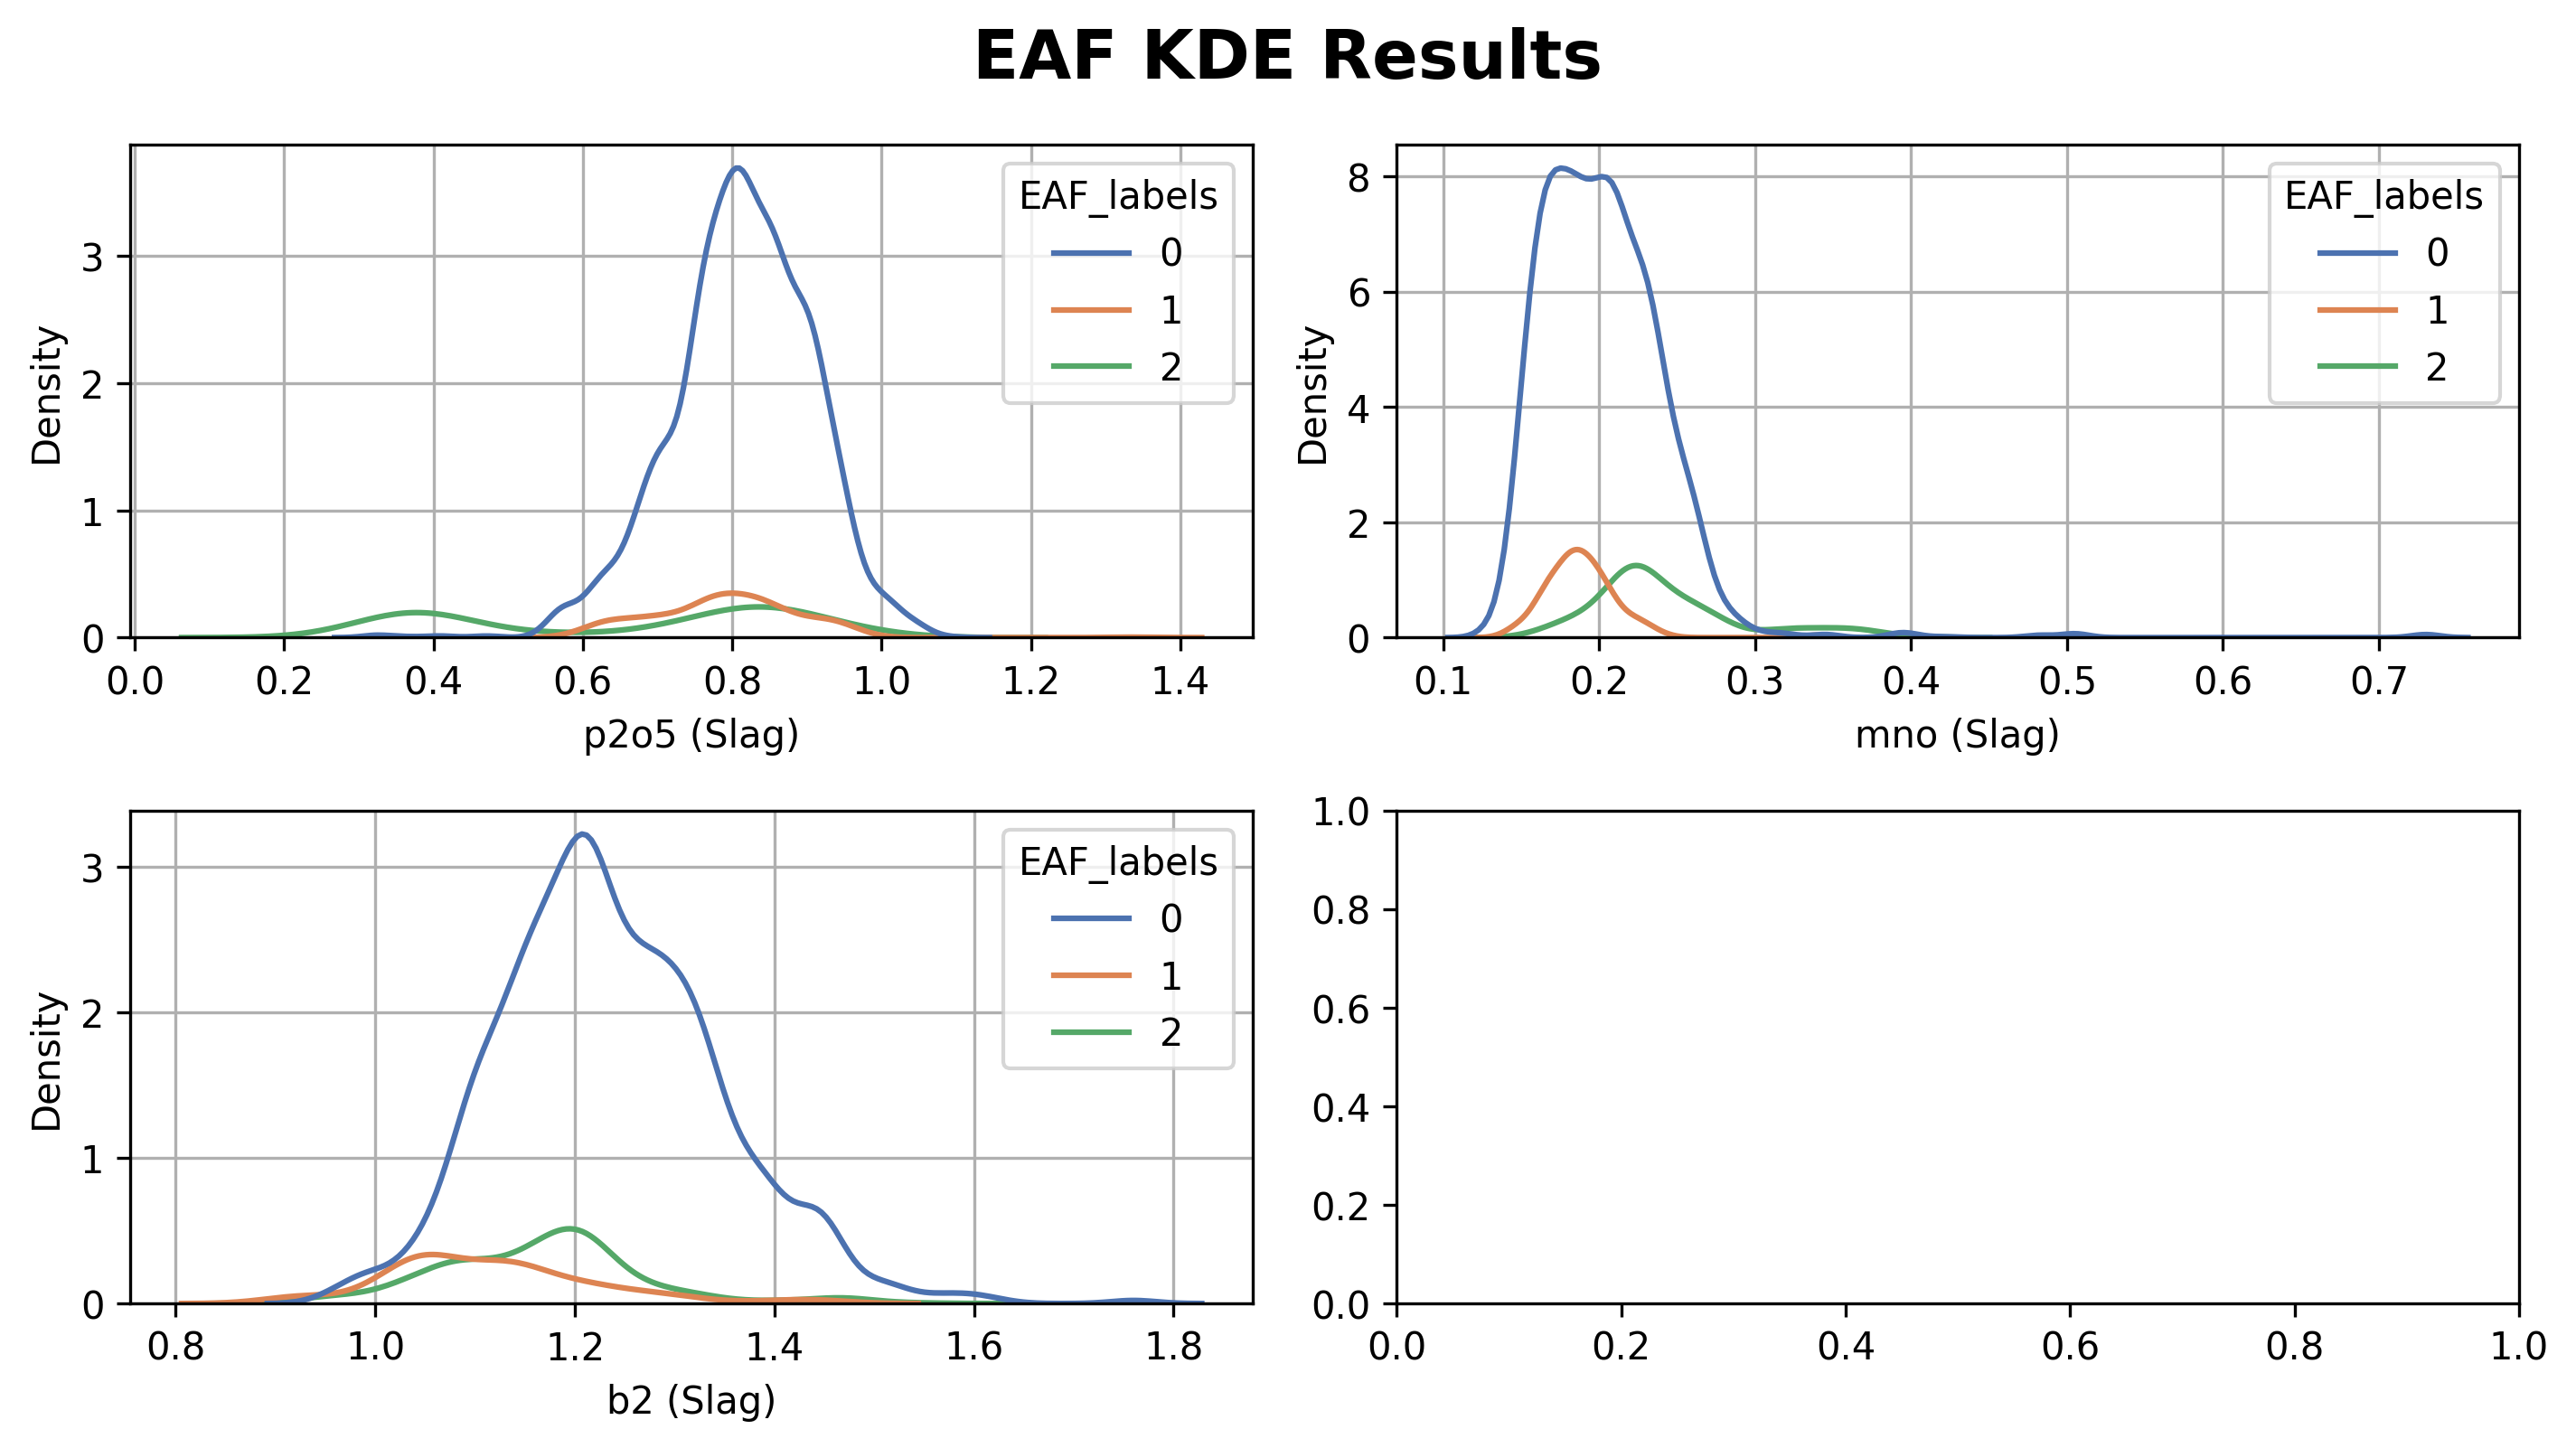

In [24]:
df = pd.read_csv(f"{working_dir}/data/eaf_and_slag.csv")
df.set_index(keys='Heat', inplace=True ,drop=True)
#--------Normalizing-------- 
scale = MinMaxScaler()
normal_df = pd.DataFrame(data = scale.fit_transform(df) , columns= df.columns)
print(normal_df.shape)
#--------Correlation--------
corr_df = normal_df.corr().abs()
corr_df = corr_df.where(np.triu(np.ones(corr_df.shape),k= 1).astype(bool)) #paiine matice motegharen ast ve hazf shod
high_corr_columns_name = pd.DataFrame(corr_df.ge(.95).stack().loc[lambda corr_df: corr_df].index.to_list())
print(high_corr_columns_name)
df.drop(labels=['Delays (EAF)','EAF_DRI (EAF)','b3 (Slag)','Chemical [MWh] (EAF)','b4 (Slag)'] ,axis=1,inplace=True)
#-------Clustering---------
scale = MinMaxScaler()
normal_df = pd.DataFrame(data = scale.fit_transform(df) , columns= df.columns)
t_sne = TSNE(n_components=2, learning_rate='auto',random_state=0,
                  init='random', perplexity=100)
data=t_sne.fit_transform(normal_df)
sne_column_name = [f"SNE{column}"  for column in range(2) ]
sne_df = pd.DataFrame(data=data,columns=sne_column_name)
print(sne_df.shape)
model = AgglomerativeClustering(n_clusters = 3, metric= 'euclidean', linkage ='average')
model.fit(sne_df)
print(model.labels_.shape)
# ---------PLOT-------------
fig = plt.figure(figsize=(9.6,5.4),dpi=300)
fig.suptitle('EAF T-SNE Clusters', fontsize=18,fontweight='bold')
ax1 = fig.subplots(1,1)
ax1.set_xlabel('Axis 0', fontsize=16,fontweight='bold')
ax1.set_ylabel('Axis 1', fontsize=16,fontweight='bold')
#ax1.xaxis.set_major_locator(ticker.MultipleLocator(0.01))
cmap = sns.color_palette("deep", as_cmap=True)
sns.scatterplot(
    data=sne_df,
    x='SNE0',
    y='SNE1',
    hue=model.labels_,
    palette= cmap,
    )
fig.tight_layout()
#plt.savefig(f'{working_dir}/presentation/coke-1030-tsne-clusters.jpg')
plt.show()
#----------Labeling---------
clust_lable_dict = {0:0,1:1,2:2,3:3,4:4,5:5,6:6}
labels = [clust_lable_dict[i] for i in model.labels_]
df["EAF_labels"] = labels
print(df.shape)
#----------Labes Conditions-----
plot_name = df.columns.drop('EAF_labels')
print(plot_name)
num = 0
for k in range(6):
    fig = plt.figure(num=k,figsize=(9.6,5.4),dpi=300)
    fig.suptitle('EAF KDE Results', fontsize=18,fontweight='bold')
    ax = fig.subplots(2,2)
    #sns.set_style("ticks",{'axes.grid' : True})
    for i in range(2):
        for j in range(2):
            if num == len(plot_name):
                break
            ax[i][j].grid(True)
            sns.kdeplot(
                data=df,
                x=plot_name[num],
                hue="EAF_labels",
                #hue_order=[0,2,3,],
                fill=False,
                #alpha = 0.4,
                palette= cmap,
                ax=ax[i][j],
            )
            num = num +1
    fig.tight_layout()
#ax[0][0].xaxis.set_major_locator(ticker.MultipleLocator(1))
#ax[0][0].axvline(83.4,color=cmap[0])
#ax[0][0].text(83.2, 0.2, '83.4', rotation=90, va='center')
#ax[0][0].axvline(80.6,color=cmap[1])
#ax[0][0].text(80.4, 0.2, '80.6', rotation=90, va='center')
#ax[0][1].xaxis.set_major_locator(ticker.MultipleLocator(0.1))
#ax[0][1].axvline(0.96,color=cmap[0])
#ax[0][1].text(0.92, 1.6, '0.96', rotation=90, va='center')
#ax[0][1].axvline(1.39,color=cmap[1])
#ax[0][1].text(1.35, 1.6, '1.39', rotation=90, va='center')
#ax[1][0].xaxis.set_major_locator(ticker.MultipleLocator(1))
#ax[1][0].axvline(2.4,color=cmap[0])
#ax[1][0].text(2.2, 0.2, '2.4', rotation=90, va='center')
#ax[1][0].axvline(1.5,color=cmap[1])
#ax[1][0].text(1.3, 0.2, '1.5', rotation=90, va='center')
#plt.savefig(f'{working_dir}/presentation/coke-1030-kde-results.jpg')
plt.show()
# save For next use
df.to_csv(f"{working_dir}/data/eaf_and_slag_with_labels.csv",index=True)
del df,normal_df,corr_df,high_corr_columns_name